In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kmodes.kmodes import KModes
import functions

sns.set_style('whitegrid')

In [2]:
data_full = pd.read_excel("./data/originals/Analizsiz_v1.3.xlsx")

In [3]:
data_full

,classification,positionId,positiondescription,newpositiongroupcode,companyId,SalaryType,leavedate,salarycount,creationdate,Price,mainsectorname
0,Satış - Pazarlama,2408,Satış Aplikasyon Sorumlusu,B2,315643,Net,NaN,12,2019-10-11 16:48:20.756,3200,Ticaret
1,Teknik Hizmetler,3302,Dizayn Ofis Şefi,B3,298022,Net,NaN,12,2019-10-11 16:48:25.168,3500,Yapı
2,Müşteri Hizmetleri,1351,Müşteri Temsilcisi,B1,279905,Net,NaN,12,2019-10-11 16:48:43.345,2020,Telekomünikasyon
3,Teknik Hizmetler,1819,Teknik Koordinatör,B4,273851,Net,NaN,12,2019-10-11 16:48:44.696,5250,Hizmet
4,Bilgi Teknolojileri,7539,Grafik Tasarım Sorumlusu,B2,266120,Net,NaN,12,2019-10-11 16:52:26.743,3500,Sigortacılık
...,...,...,...,...,...,...,...,...,...,...,...
500191,Elektrik / Elektronik,7067,Uzman Elektrik Mühendisi,B2,275266,Net,NaN,13,2020-09-11 18:21:06.062,18000,Yapı
500192,Teknik Hizmetler,5941,Argon Kaynakçısı,M2,328344,Net,NaN,12,2020-09-11 18:21:10.671,5000,Otomotiv
500193,İnsan Kaynakları,854,İnsan Kaynakları Sorumlusu,B2,293710,Net,NaN,12,2020-09-11 18:21:11.858,3500,Gıda
500194,İdari İşler,1587,Satın Alma Mühendisi,B2,272314,Brut,NaN,16,2020-09-11 18:21:14.796,7220,Otomotiv


In [4]:
def apply_worker_type(row):
    try:
        return row["newpositiongroupcode"][0]
    except:
        return None
data_full['worker_type'] = data_full.apply(apply_worker_type,axis=1)

def apply_level(row):
    try:
        level = row["newpositiongroupcode"][1]
        if level == "O":
            return 0
        return int(level)
    except:
        return -1
    
data_full['expertise'] = data_full.apply(apply_level,axis=1)
data_full

,classification,positionId,positiondescription,newpositiongroupcode,companyId,SalaryType,leavedate,salarycount,creationdate,Price,mainsectorname,worker_type,expertise
0,Satış - Pazarlama,2408,Satış Aplikasyon Sorumlusu,B2,315643,Net,NaN,12,2019-10-11 16:48:20.756,3200,Ticaret,B,2
1,Teknik Hizmetler,3302,Dizayn Ofis Şefi,B3,298022,Net,NaN,12,2019-10-11 16:48:25.168,3500,Yapı,B,3
2,Müşteri Hizmetleri,1351,Müşteri Temsilcisi,B1,279905,Net,NaN,12,2019-10-11 16:48:43.345,2020,Telekomünikasyon,B,1
3,Teknik Hizmetler,1819,Teknik Koordinatör,B4,273851,Net,NaN,12,2019-10-11 16:48:44.696,5250,Hizmet,B,4
4,Bilgi Teknolojileri,7539,Grafik Tasarım Sorumlusu,B2,266120,Net,NaN,12,2019-10-11 16:52:26.743,3500,Sigortacılık,B,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500191,Elektrik / Elektronik,7067,Uzman Elektrik Mühendisi,B2,275266,Net,NaN,13,2020-09-11 18:21:06.062,18000,Yapı,B,2
500192,Teknik Hizmetler,5941,Argon Kaynakçısı,M2,328344,Net,NaN,12,2020-09-11 18:21:10.671,5000,Otomotiv,M,2
500193,İnsan Kaynakları,854,İnsan Kaynakları Sorumlusu,B2,293710,Net,NaN,12,2020-09-11 18:21:11.858,3500,Gıda,B,2
500194,İdari İşler,1587,Satın Alma Mühendisi,B2,272314,Brut,NaN,16,2020-09-11 18:21:14.796,7220,Otomotiv,B,2


In [5]:
data = data_full.sample(n=10_000)
data = data[["classification", "positiondescription", "mainsectorname","companyId","worker_type","expertise"]]
data.rename(
    columns = {
        'classification':'position_sector', 
        'positiondescription':'position_name',
        "mainsectorname": "company_sector",
        "companyId": "company_id"
    }, 
    inplace = True
)
data = data.dropna()

data = data.drop(["company_id"],axis=1)

data

,position_sector,position_name,company_sector,worker_type,expertise
148026,Tıp / Sağlık,Eczacı Kalfası,Sağlık,M,1
430219,Depolama / Dağıtım,Depo İşçisi,Perakende,B,1
76040,Hukuk,Avukat,Sağlık,B,3
377052,Mühendislik,Mühendislik Yöneticisi,Bilişim,B,3
149232,Makine,Motor Bakım ve Onarım Teknisyeni,Ticaret,M,2
...,...,...,...,...,...
291682,Ticaret,Dış Ticaret Operasyon Uzmanı,Hızlı Tüketim Malları,B,2
478328,Bilgi Teknolojileri,Yazılım Takım Lideri,Finans - Ekonomi,B,3
77658,İnsan Kaynakları,İnsan Kaynakları Grup Yöneticisi,Gıda,B,3
46009,Tıp / Sağlık,Biyomedikal Cihaz Teknikeri,Hizmet,M,2


In [ ]:
#Use KMode

# Elbow curve to find optimal K
cost = []
K = range(1,20)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    print(num_clusters,"/",len(K))
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [84]:
optimal_k = 6
kmode = KModes(n_clusters=optimal_k, init="random", n_init=5)
predictions = kmode.fit_predict(data)

functions.evaluate_clusters(data, predictions)

KeyboardInterrupt: 

In [8]:
data

,position_sector,position_name,company_sector,company_id,worker_type,expertise
59400,İdari İşler,İdari İşler Memuru,Eğitim,273344,B,1
289854,Satış - Pazarlama,Satış Uzmanı,Otomotiv,274498,B,2
444621,Strateji ve Raporlama / Danışmanlık,Planlama Sorumlusu,Tekstil,308112,B,2
136694,Eğitim,İngilizce Öğretmeni,Basım - Yayın,276370,B,3
375367,Makine,Mekanik Tasarım Mühendisi,Üretim / Endüstriyel Ürünler,421542,B,2
...,...,...,...,...,...,...
47688,Satış - Pazarlama,Satış Temsilcisi,Gıda,318112,B,1
88593,İdari İşler,Satın Alma Müdürü,Otomotiv,272875,B,4
346922,Operasyon,Saha Operasyon Müdürü,Üretim / Endüstriyel Ürünler,272388,B,4
95403,Teknik Hizmetler,Bakım Uzmanı,Yapı,260958,B,2


In [6]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plot_silhouette(distance_matrix,clusters):
    cluster_labels = np.unique(clusters) # kume etiketlerini cekelim

    print('Labels')
    print(cluster_labels)

    print('Shape')
    print(cluster_labels.shape)

    n_clusters = cluster_labels.shape[0]  

    print('Kume sayisi')
    print(n_clusters)

    silhouette_vals = silhouette_samples(distance_matrix, clusters, metric='precomputed')

    #print('silhouette vals:')
    #print(silhouette_vals)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):  # her bir kume icin 0,1,2 ...
        c_silhouette_vals = silhouette_vals[clusters == c] # su anki küme için
        c_silhouette_vals.sort() # değerleri sırala
        y_ax_upper += len(c_silhouette_vals) 
        color = cm.jet(float(i) / n_clusters) # bir renk sec
        plt.barh(range(y_ax_lower, y_ax_upper),
                c_silhouette_vals,
                height=1.0,
                edgecolor='none',
                color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)


    print(silhouette_avg)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)   # 0.ci yazmasin, 1den baslasin
    plt.ylabel('Küme')
    plt.xlabel('Silhouette katsayısı')
    plt.show()


In [6]:
import gower
distance_matrix = gower.gower_matrix(data)
distance_matrix.max(),distance_matrix.min()

(0.95, 0.0)

In [ ]:
from sklearn import cluster
algos = [
    KModes(n_clusters=6 , init="random", n_init=5),
    KModes(n_clusters=10, init="random", n_init=5),
    #cluster.KMeans(n_clusters=2),
    #cluster.AffinityPropagation(affinity="precomputed"),
    #!Bu çalışmıyor
    #cluster.FeatureAgglomeration(affinity="precomputed",linkage="average")
    ##BUNU ÇALIŞTIRIKEN 1-distance_matrix VERMEM GEREKİYOR OLABİLİR!!!!
    #cluster.SpectralClustering(affinity="precomputed"),
    #cluster.DBSCAN(metric="precomputed",eps=0.16),
    #cluster.OPTICS(metric="precomputed",eps=0.16),
    
    
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="average",n_clusters=2),
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="average",n_clusters=3),
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="average",n_clusters=4),
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="average",n_clusters=10),
    
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="single",n_clusters=2),
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="single",n_clusters=3),
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="single",n_clusters=4),
    
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="complete",n_clusters=2),
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="complete",n_clusters=3),
    cluster.AgglomerativeClustering(affinity="precomputed",linkage="complete",n_clusters=4),
]

for algo in algos:
    plot_silhouette(distance_matrix,algo.fit_predict(distance_matrix))

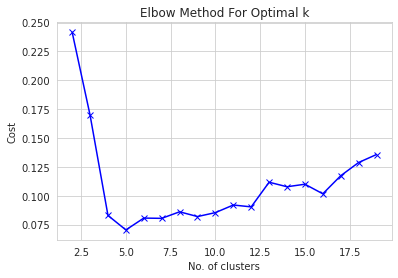

In [91]:
costs = []
K = range(2,20)
for num_clusters in list(K):
    kmode = cluster.AgglomerativeClustering(n_clusters=num_clusters, affinity="precomputed",linkage="average")
    clusters = kmode.fit_predict(distance_matrix)
    
    cluster_labels = np.unique(clusters) # kume etiketlerini cekelim
    n_clusters = cluster_labels.shape[0]  
    silhouette_vals = silhouette_samples(distance_matrix, clusters, metric='precomputed')
    silhouette_avg = np.mean(silhouette_vals)

    costs.append(silhouette_avg)
    
plt.plot(K, costs, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
data

,position_sector,position_name,company_sector,worker_type,expertise
148026,Tıp / Sağlık,Eczacı Kalfası,Sağlık,M,1
430219,Depolama / Dağıtım,Depo İşçisi,Perakende,B,1
76040,Hukuk,Avukat,Sağlık,B,3
377052,Mühendislik,Mühendislik Yöneticisi,Bilişim,B,3
149232,Makine,Motor Bakım ve Onarım Teknisyeni,Ticaret,M,2
...,...,...,...,...,...
291682,Ticaret,Dış Ticaret Operasyon Uzmanı,Hızlı Tüketim Malları,B,2
478328,Bilgi Teknolojileri,Yazılım Takım Lideri,Finans - Ekonomi,B,3
77658,İnsan Kaynakları,İnsan Kaynakları Grup Yöneticisi,Gıda,B,3
46009,Tıp / Sağlık,Biyomedikal Cihaz Teknikeri,Hizmet,M,2


In [26]:
from pyclustering.cluster.rock import rock
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

# Read sample for clustering from file.
sample = data.sample(100).to_numpy()#read_sample(FCPS_SAMPLES.SAMPLE_HEPTA)

# Create instance of ROCK algorithm for cluster analysis
number_clusters = 20
rock_instance = rock(sample, 1.0, number_clusters,ccore=False)

# Run cluster analysis.
rock_instance.process()

# Obtain results of clustering.
clusters = rock_instance.get_clusters()

TypeError: unsupported operand type(s) for -: 'str' and 'str'